In [ ]:
#rename the file df and import data via pandas read csv 
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('df.csv')
df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
null_rows = df[df.isnull().any(axis=1)]

# print out the null rows
null_rows

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [ ]:
#Fill empty value
df.loc[889786, ['geolocation_lng','geolocation_city','geolocation_state']] = [-51.8136,'Santa Fé','PR']

In [ ]:
#Drop duplicate
df = df.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')

<Axes: >

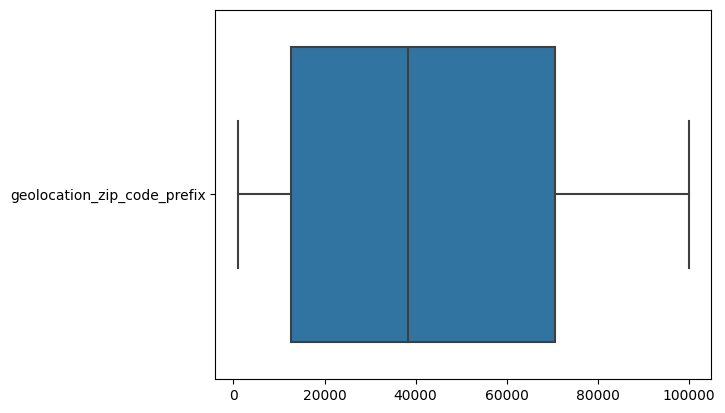

In [ ]:
#Check for outlier
import seaborn as sns
sns.boxplot(data=df[['geolocation_zip_code_prefix']], orient='h')

<Axes: >

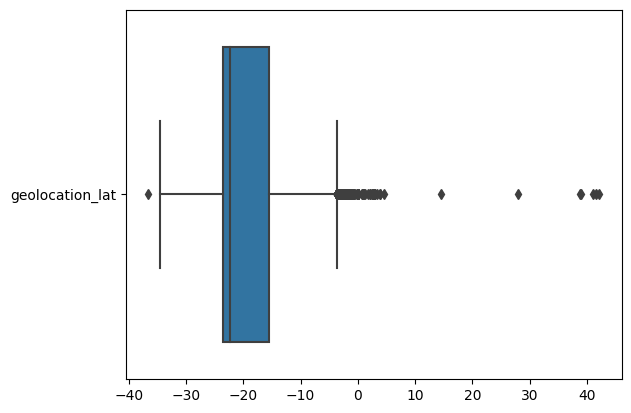

In [ ]:
sns.boxplot(data=df[['geolocation_lat']], orient='h')

<Axes: >

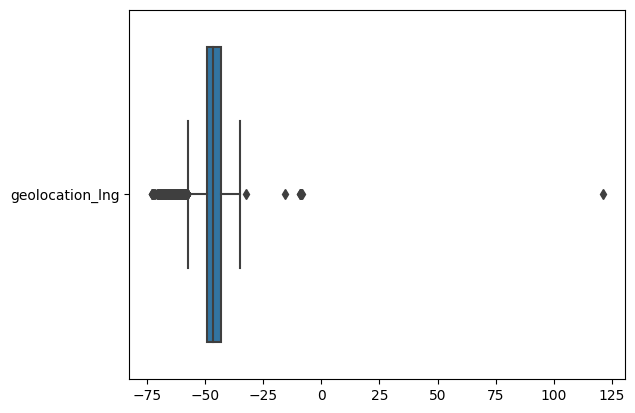

In [ ]:
sns.boxplot(data=df[['geolocation_lng']], orient='h')

In [ ]:
#Northest location point of Brazil is 5.27438888
df[df['geolocation_lat']> 5.27438888]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
387565,18243,28.008978,-15.536867,bom retiro da esperanca,SP
513631,28165,41.614052,-8.411675,vila nova de campos,RJ
769333,68275,41.146203,-8.577855,porto trombetas,PA
822529,78131,38.816816,-9.394625,varzea grande,MT
860562,83252,42.184003,-8.723762,ilha dos valadares,PR
865611,83810,39.057629,-9.400037,areia branca dos assis,PR
965687,95130,14.585073,121.105394,santa lucia do piai,RS


In [ ]:
#multiple location wrongly located lat long
df.loc[387565, ['geolocation_lat','geolocation_lng']] = [-25.057882,-53.300609]
df.loc[513631, ['geolocation_lat','geolocation_lng']] = [-21.445,-41.4075]
df.loc[769333, ['geolocation_lat','geolocation_lng']] = [-1.4669,-56.379457]
df.loc[822529, ['geolocation_lat','geolocation_lng']] = [-15.646248,-56.132713]
df.loc[860562	, ['geolocation_lat','geolocation_lng']] = [-25.535,-48.492]
df.loc[865611	, ['geolocation_lat','geolocation_lng']] = [-25.873,-49.3616]
df.loc[965687, ['geolocation_lat','geolocation_lng']] = [-29.2373339, -51.0246894]

In [ ]:
#Southern location point of Brazil is -33.75116944
df[df['geolocation_lat'] <= -33.75116944]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
513643,28155,-34.586422,-58.732101,santa maria,RJ
992584,98780,-36.605374,-64.283946,santa rosa,RS


In [ ]:
#santa maria located in argentina we change it with lat long of santa maria rio janeiro Brazil
df.loc[513643, ['geolocation_lat','geolocation_lng']] = [-21.952996188, -42.004666648]
df.loc[992584, ['geolocation_lat','geolocation_lng']] = [-27.87083, -54.48139]

In [ ]:
#Western location point of Brazil is -73.98283055
df[df['geolocation_lng'] <= -73.98283055]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [ ]:
#Eastern location point of Brazil is -73.98283055
df[df['geolocation_lng'] >= -34.79314722]
# fernando de noronha is an Island so legit

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
715892,53990,-3.845491,-32.413367,fernando de noronha,PE


In [ ]:
#Change zip code to enforce 5 digits
df['geolocation_zip_code_prefix'] = df['geolocation_zip_code_prefix'].astype(str).str.zfill(5)
df

<ipython-input-16-deba7501ed44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geolocation_zip_code_prefix'] = df['geolocation_zip_code_prefix'].astype(str).str.zfill(5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP
5,01012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [ ]:
#Install library to remove accent
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from unidecode import unidecode

# remove accents from the 'geolocation_city' column
df['geolocation_city'] = df['geolocation_city'].apply(lambda x: unidecode(x))

# print the updated DataFrame
df

<ipython-input-18-06143b1f19cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geolocation_city'] = df['geolocation_city'].apply(lambda x: unidecode(x))


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP
5,01012,-23.547762,-46.635361,sao paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [ ]:
#Enter a new dataframe with inhabitant to enhance the data
fd = pd.read_excel('fd.xls',sheet_name='Municípios')
fd.tail(1000)

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NOS MUNICÍPIOS BRASILEIROS COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
4594,SC,42,19002,Urussanga,21419
4595,SC,42,19101,Vargeão,3569
4596,SC,42,19150,Vargem,2387
4597,SC,42,19176,Vargem Bonita,4411
4598,SC,42,19200,Vidal Ramos,6321
...,...,...,...,...,...
5589,(15) População judicial do município de Ferrei...,NaN,NaN,NaN,NaN
5590,(16) População judicial do município Coronel J...,NaN,NaN,NaN,NaN
5591,(17) População judicial do município Ibiassucê...,NaN,NaN,NaN,NaN
5592,(18) População judicial do município de Rodela...,NaN,NaN,NaN,NaN


In [ ]:
#Remove rows
fd = fd.iloc[:5571]
fd

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NOS MUNICÍPIOS BRASILEIROS COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
1,RO,11,00015,Alta Floresta D'Oeste,22516
2,RO,11,00023,Ariquemes,111148
3,RO,11,00031,Cabixi,5067
4,RO,11,00049,Cacoal,86416
...,...,...,...,...,...
5566,GO,52,22005,Vianópolis,14088
5567,GO,52,22054,Vicentinópolis,9002
5568,GO,52,22203,Vila Boa,6451
5569,GO,52,22302,Vila Propício,5941


In [ ]:
#Rename columns
fd = fd.rename(columns={'ESTIMATIVAS DA POPULAÇÃO RESIDENTE NOS MUNICÍPIOS BRASILEIROS COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2021': 'State', 'Unnamed: 1': 'UF','Unnamed: 2':"Munic. code", 'Unnamed: 3':"Municipality","Unnamed: 4" : "Population" })

In [ ]:
#Drop first row
fd = fd.drop(index=0)
fd

,State,UF,Munic. code,Municipality,Population
1,RO,11,00015,Alta Floresta D'Oeste,22516
2,RO,11,00023,Ariquemes,111148
3,RO,11,00031,Cabixi,5067
4,RO,11,00049,Cacoal,86416
5,RO,11,00056,Cerejeiras,16088
...,...,...,...,...,...
5566,GO,52,22005,Vianópolis,14088
5567,GO,52,22054,Vicentinópolis,9002
5568,GO,52,22203,Vila Boa,6451
5569,GO,52,22302,Vila Propício,5941


In [ ]:
# remove accents from the 'geolocation_city' column
fd['Municipality'] = fd['Municipality'].apply(lambda x: unidecode(x))
fd['Municipality'] = fd['Municipality'].str.lower()

In [ ]:
fd

,State,UF,Munic. code,Municipality,Population
1,RO,11,00015,alta floresta d'oeste,22516
2,RO,11,00023,ariquemes,111148
3,RO,11,00031,cabixi,5067
4,RO,11,00049,cacoal,86416
5,RO,11,00056,cerejeiras,16088
...,...,...,...,...,...
5566,GO,52,22005,vianopolis,14088
5567,GO,52,22054,vicentinopolis,9002
5568,GO,52,22203,vila boa,6451
5569,GO,52,22302,vila propicio,5941


In [ ]:
# Merge the dataframes on the "key" column
merged = pd.merge(df, fd, left_on="geolocation_city", right_on="Municipality", how="left")

In [ ]:
merged.drop(columns = ['geolocation_city','geolocation_state','UF','Munic. code'],inplace=True)

In [ ]:
merged

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,State,Municipality,Population
0,01037,-23.545621,-46.639292,SP,sao paulo,12396372
1,01046,-23.546081,-46.644820,SP,sao paulo,12396372
2,01041,-23.544392,-46.639499,SP,sao paulo,12396372
3,01035,-23.541578,-46.641607,SP,sao paulo,12396372
4,01012,-23.547762,-46.635361,SP,sao paulo,12396372
...,...,...,...,...,...,...
20656,99955,-28.107588,-52.144019,RS,vila langaro,2070
20657,99970,-28.345143,-51.876926,RS,ciriaco,4693
20658,99910,-27.863500,-52.084760,RS,floriano peixoto,1709
20659,99920,-27.858716,-52.300403,RS,erebango,2978


In [ ]:
merged = merged.rename(columns={'Population':"Population_Municipalities" })

In [ ]:
# Create a dictionary that maps state codes to full state names
state_names = {
    "AC": "Acre",
    "AL": "Alagoas",
    "AP": "Amapá",
    "AM": "Amazonas",
    "BA": "Bahia",
    "CE": "Ceará",
    "DF": "Distrito Federal",
    "ES": "Espírito Santo",
    "GO": "Goiás",
    "MA": "Maranhão",
    "MT": "Mato Grosso",
    "MS": "Mato Grosso do Sul",
    "MG": "Minas Gerais",
    "PA": "Pará",
    "PB": "Paraíba",
    "PR": "Paraná",
    "PE": "Pernambuco",
    "PI": "Piauí",
    "RJ": "Rio de Janeiro",
    "RN": "Rio Grande do Norte",
    "RS": "Rio Grande do Sul",
    "RO": "Rondônia",
    "RR": "Roraima",
    "SC": "Santa Catarina",
    "SP": "São Paulo",
    "SE": "Sergipe",
    "TO": "Tocantins"
}

# Map state codes to full state names
merged["State"] = merged["State"].map(state_names)

In [ ]:
null_rows = df[df.isnull().any(axis=1)]

# print out the null rows
print(null_rows)

Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []


In [ ]:
#Drop duplicates
merged.drop_duplicates(subset="geolocation_zip_code_prefix",inplace=True)

In [ ]:
#Export data in a csv file
from google.colab import files
merged.to_csv('Geoloc_demo.csv') 
files.download('Geoloc_demo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>